**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_mldata, fetch_20newsgroups
from scipy.spatial.distance import cdist
from scipy.stats import mode
from sklearn.neighbors  import KDTree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.kd = False
        if algorithm == 'kd_tree':
            kd = True
    
    def fit(self, X, y):
        self.base_data = X
        self.targets = y
        return self
    
    def predict(self, X):
        if not self.kd :
            D = cdist(self.base_data,X,metric = 'minkowski',p = 2)
            predicted = self.targets[np.argpartition(D[:,:],kth = self.n_neighbors,axis = 0)[:self.n_neighbors].T]
            predicted = mode(predicted,axis = 1)[0].reshape(1,-1)
        else:
            T = KDTree(X_train,leaf_size=30, metric='minkowski') #dflt
            D = T.query(X_test,k=n_neighbors,return_distance = False)
            predicted = mode(y_train[D],axis = 1)[0].reshape(1,-1)
        return predicted[0]
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

MyKNeighborsClassifier(algorithm=None, n_neighbors=2)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

Wall time: 1 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


MyKNeighborsClassifier(algorithm=None, n_neighbors=2)

In [10]:
%time clf.predict(X_test)

Wall time: 4 ms


array([0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 0, 2, 1, 0])

In [11]:
%time my_clf.predict(X_test) #I win)

Wall time: 3 ms


array([0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 0, 2, 1, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

Wall time: 999 µs


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


MyKNeighborsClassifier(algorithm=None, n_neighbors=2)

In [16]:
%time clf.predict(X_test)

Wall time: 188 ms


array([1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1])

In [17]:
%time my_clf.predict(X_test) #win

Wall time: 3 ms


array([1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
vectorizer = CountVectorizer()
data_transformed = vectorizer.fit_transform(np.array(data))

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
kf = KFold(n_splits = 3)

In [25]:
folds =  kf.split(data_transformed,target)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

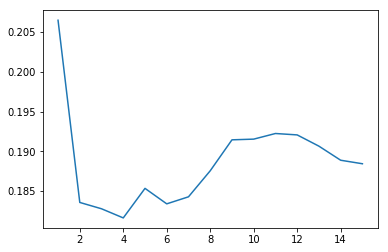

In [26]:
from tqdm import tqdm_notebook
scores = []
for n in tqdm_notebook(range(1,16)):
    score = []
    for train_index,test_index in kf.split(data_transformed,target):        
        X_train, X_test = data_transformed[train_index], data_transformed[test_index]
        y_train, y_test = target[train_index], target[test_index]
        knn = KNeighborsClassifier(n_neighbors = n)
        knn.fit(X_train,y_train)
        pred = knn.predict(X_test)
        knn_score = accuracy_score(pred,y_test)
        score.append(knn_score)
    scores.append(np.mean(score))
    
    
plt.plot(np.arange(1,16),scores)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

При проверке модели , обученной на данных, преобразованных с помощью Tdidf оказалось, что разница мала. Поэтому далее выберем модель, использованную с Count_vectorizer

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [27]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [29]:
data_ = newsgroups['data']
target__ = newsgroups['target']
knn = KNeighborsClassifier(n_neighbors =  12) #With higher score)
knn.fit(data_transformed,target)
X = vectorizer.transform(data_)
knn.score(X,target__)

0.17498672331386086

In [30]:
scores[11] # Cross-validation score

0.19206338694427036

##### Выводы
Приведенный пример показывает, что cv score и train score отличаются довольно значительно. Это означает, что модель была слегка переобучена. Возможные способы уменьшения  разницы - использование большего количества folds блоков, использование более простой  модели.